In [1]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

# Straight Line Detection
---
### Original Image

In [3]:
image = cv2.imread('sudoku_board.jpg')
ori_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

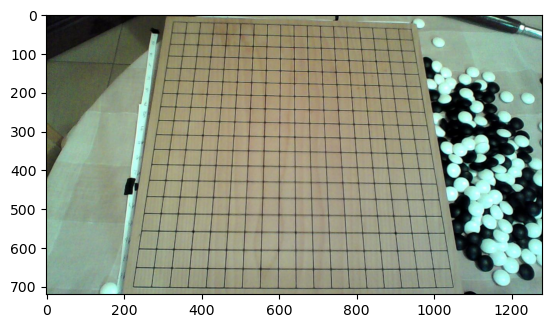

In [5]:
plt.imshow(ori_image)

### Grayscaled Image

In [7]:
gray_image = cv2.cvtColor(ori_image, cv2.COLOR_RGB2GRAY)

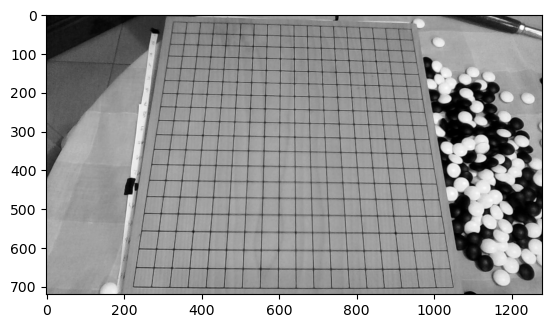

In [9]:
plt.imshow(gray_image, cmap = 'gray')

### Edge Detection with Canny Edge Method

In [11]:
image_edges = cv2.Canny(gray_image, 50, 150, apertureSize = 3)

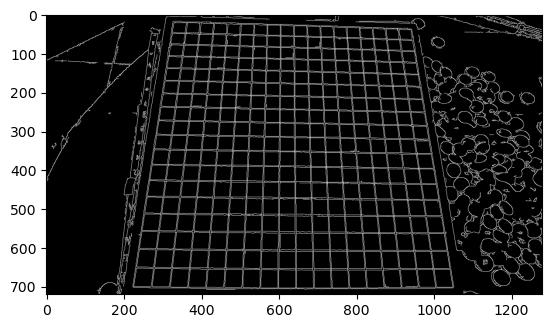

In [13]:
plt.imshow(image_edges, cmap = 'gray')

In [15]:
lines = cv2.HoughLines(image_edges, 1, np.pi/180, 200)

In [17]:
lines

array([[[ 6.5400000e+02,  1.5707964e+00]],

       [[ 3.4100000e+02,  1.5882496e+00]],

       [[ 3.0600000e+02,  1.5882496e+00]],

       [[ 7.0600000e+02,  1.5707964e+00]],

       [[ 6.1000000e+02,  1.5707964e+00]],

       [[ 7.0400000e+02,  1.5707964e+00]],

       [[ 2.7000000e+02,  1.5882496e+00]],

       [[ 3.7900000e+02,  1.5882496e+00]],

       [[ 3.4400000e+02,  1.5882496e+00]],

       [[ 3.0400000e+02,  1.5882496e+00]],

       [[ 7.0000000e+00,  1.6057029e+00]],

       [[ 5.6400000e+02,  1.5707964e+00]],

       [[ 3.8200000e+02,  1.5882496e+00]],

       [[ 5.6200000e+02,  1.5707964e+00]],

       [[ 2.3400000e+02,  1.5882496e+00]],

       [[ 2.0000000e+02,  1.5882496e+00]],

       [[ 4.2100000e+02,  1.5882496e+00]],

       [[ 4.1900000e+02,  1.5882496e+00]],

       [[ 5.0500000e+02,  6.9813170e-02]],

       [[ 5.0000000e+00,  1.6057029e+00]],

       [[ 2.6700000e+02,  1.5882496e+00]],

       [[ 3.5000000e+01,  1.6057029e+00]],

       [[-8.9700000e+02,  3.0019

In [19]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))  
    y1 = int(y0 + 1000 * (a))    
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(ori_image, (x1, y1), (x2, y2), (255, 0, 255), 1)

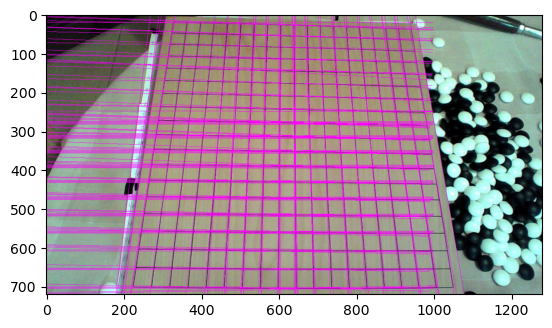

In [21]:
plt.imshow(ori_image)

### The above image has lines crossing over the detected edges

In [23]:
lines = cv2.HoughLinesP(image_edges, 1, np.pi/180, 100, minLineLength = 100, maxLineGap = 10)

In [25]:
lines

array([[[ 420,  706,  952,  706]],

       [[ 508,  315,  644,  317]],

       [[ 301,  347,  401,  348]],

       [[ 524,  654, 1044,  654]],

       [[ 584,  610, 1037,  610]],

       [[ 512,  279,  853,  285]],

       [[ 544,  704,  856,  704]],

       [[ 798,   63,  948,   68]],

       [[ 858,  397,  964,  399]],

       [[ 363,  350,  495,  352]],

       [[ 871,  249,  978,  251]],

       [[ 449,  432,  644,  432]],

       [[ 832,  394, 1002,  396]],

       [[ 598,  564,  899,  564]],

       [[ 476,  427,  579,  429]],

       [[ 418,  615,  446,  284]],

       [[ 742,   31,  844,   34]],

       [[ 294,  237,  430,  239]],

       [[ 914,   55,  952,  326]],

       [[ 962,   54, 1060,  607]],

       [[ 272,  238,  297,   85]],

       [[ 258,  467,  439,  470]],

       [[ 521,  177,  642,  179]],

       [[ 360,  516,  478,  516]],

       [[ 642,  434,  782,  434]],

       [[ 705,   32,  858,   37]],

       [[ 466,  575,  484,  305]],

       [[ 516,  469,  690,  

In [27]:
ori_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [29]:
for line in lines:
     x1, y1, x2, y2 = line[0]
     cv2.line(ori_image, (x1, y1), (x2, y2), (255, 0, 255), 1)

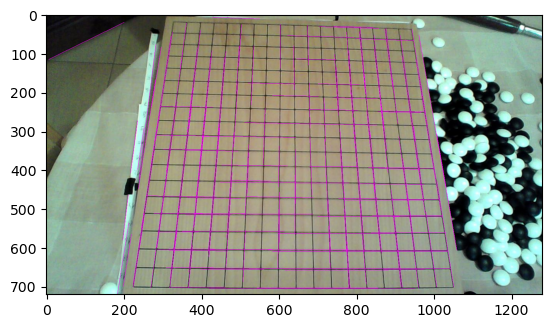

In [31]:
plt.imshow(ori_image)

# Circular Line Detection
---
### Original Image

In [38]:
shapes_img = cv2.imread('shapes.png')

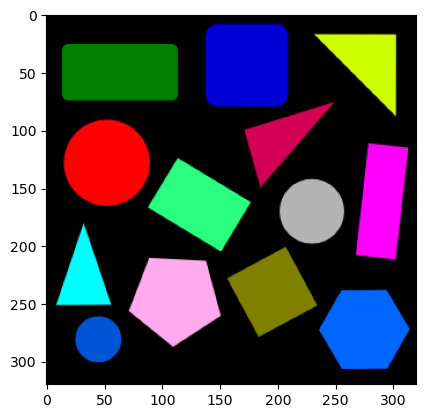

In [40]:
plt.imshow(shapes_img)

### Grayscaled Image

In [43]:
gray_shapes = cv2.cvtColor(shapes_img, cv2.COLOR_BGR2GRAY)

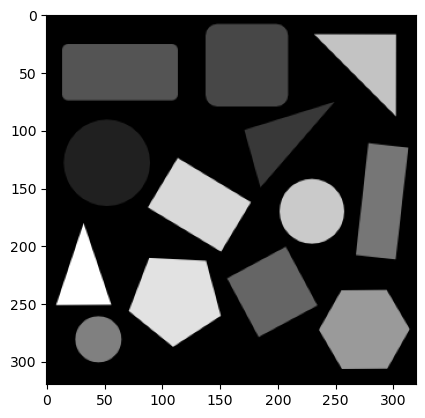

In [47]:
plt.imshow(gray_shapes, cmap = 'gray')

In [49]:
blured_shapes = cv2.medianBlur(gray_shapes, 5)

In [51]:
circles = cv2.HoughCircles(gray_shapes, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 0, maxRadius = 0)

In [53]:
circles

array([[[ 51.5, 127.5,  37.3],
        [229.5, 169.5,  27.4],
        [ 44.5, 281.5,  19.6]]], dtype=float32)

In [57]:
found_circles = np.uint16(np.around(circles))

In [59]:
for (x, y, r) in found_circles[0, :]:
    cv2.circle(shapes_img, (x, y), r, (255, 255, 255), 3)
    cv2.circle(shapes_img, (x, y), 2, (0, 255, 0), 2)

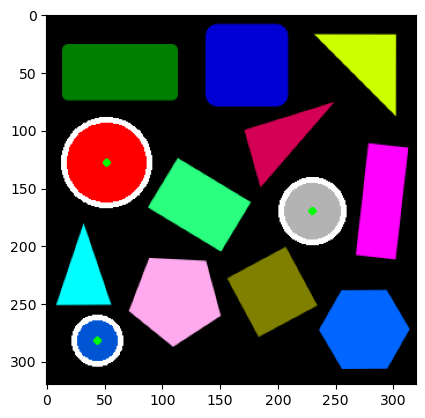

In [61]:
plt.imshow(shapes_img)